# Job Classification - Complete Workflow

1. Data Loading and Exploration
2. Data Preprocessing
3. Model Training (Random Forest, SVM, Naive Bayes)
4. Model Comparison and Evaluation

## 1. Setup and Imports

In [6]:
!pip install pandas numpy scikit-learn matplotlib seaborn

  Using cached pandas-2.0.3-cp38-cp38-win_amd64.whl.metadata (18 kB)
  Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl.metadata (5.6 kB)
  Using cached scikit_learn-1.3.2-cp38-cp38-win_amd64.whl.metadata (11 kB)
  Using cached matplotlib-3.7.5-cp38-cp38-win_amd64.whl.metadata (5.8 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached scipy-1.10.1-cp38-cp38-win_amd64.whl.metadata (58 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached contourpy-1.1.1-cp38-cp38-win_amd64.whl.metadata (5.9 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp38-cp38-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-10.4.0-cp38-cp38-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.1.4-

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import os
import sys
sys.path.append('../src')

from random_forest_classifier import RandomForestClassifier
from svm_classifier import SVMClassifier
from naive_bayes_classifier import NaiveBayesClassifier

## 2. Data Loading and Exploration

In [4]:
# Load the raw dataset
df = pd.read_csv('../data/job_title_des.csv')
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst few rows:")
df.head()

Dataset shape: (2277, 3)

Columns: ['Unnamed: 0', 'Job Title', 'Job Description']

First few rows:


,Unnamed: 0,Job Title,Job Description
0,0,Flutter Developer,We are looking for hire experts flutter develo...
1,1,Django Developer,PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ ...
2,2,Machine Learning,"Data Scientist (Contractor)\n\nBangalore, IN\n..."
3,3,iOS Developer,JOB DESCRIPTION:\n\nStrong framework outside o...
4,4,Full Stack Developer,job responsibility full stack engineer – react...


In [9]:
# Check for missing values
print("Missing values:")
df.isnull().sum()

Missing values:


Unnamed: 0         0
Job Title          0
Job Description    0
dtype: int64

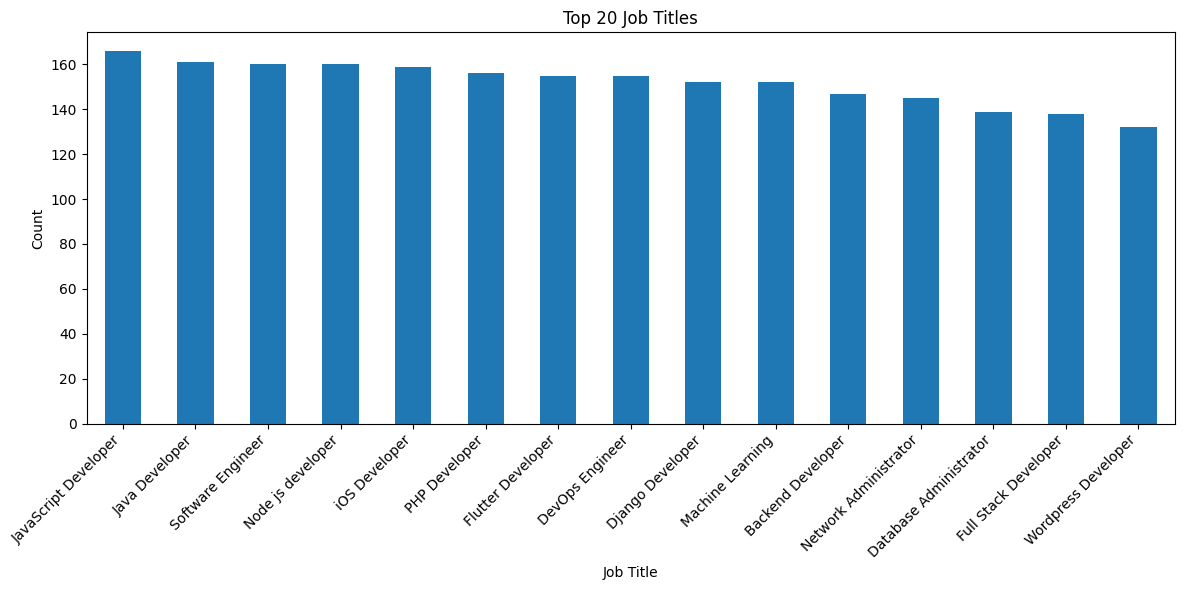

In [10]:
# Analyze job title distribution
plt.figure(figsize=(12, 6))
df['Job Title'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [5]:
df['Job Title'].value_counts()

Job Title
JavaScript Developer      166
Java Developer            161
Software Engineer         160
Node js developer         160
iOS Developer             159
PHP Developer             156
Flutter Developer         155
DevOps Engineer           155
Django Developer          152
Machine Learning          152
Backend Developer         147
Network Administrator     145
Database Administrator    139
Full Stack Developer      138
Wordpress Developer       132
Name: count, dtype: int64

## 3. Data Preprocessing

In [2]:
!pip install nltk

In [3]:
!pip install imbalanced-learn

In [4]:
# Download required NLTK data
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Komal
[nltk_data]     Patil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Komal
[nltk_data]     Patil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Komal
[nltk_data]     Patil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
from data_preprocessing import DataPreprocessor

# Initialize preprocessor
preprocessor = DataPreprocessor()

# Prepare the data
processed_df = preprocessor.prepare_data(df)
print("Processed dataset shape:", processed_df.shape)
print("\nProcessed data sample:")
processed_df.head()

[nltk_data] Downloading package punkt to C:\Users\Komal
[nltk_data]     Patil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Komal
[nltk_data]     Patil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Komal
[nltk_data]     Patil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Using text column: 'Job Description' and label column: 'Job Title'
Standardizing job titles...
Cleaning text data...
Preprocessed data saved to artifacts/preprocessed_data.csv

Distribution of sampled data:
standardized_title
javascript developer    166
java developer          161
software engineer       160
node js developer       160
ios developer           159
php developer           156
flutter developer       155
devops engineer         155
django developer        152
machine learning        152
Name: count, dtype: int64
Processed dataset shape: (1576, 5)

Processed data sample:


,Unnamed: 0,Job Title,Job Description,standardized_title,cleaned_text
7,7,JavaScript Developer,"Job Description:\n\nReactJS + NodeJs, Azure Fu...",javascript developer,description reactjs nodejs azure function grap...
22,23,JavaScript Developer,MonetizeMore builds industry leading ad techno...,javascript developer,monetizemore build industry leading technology...
29,30,JavaScript Developer,"No relocation needed, can telework from home, ...",javascript developer,relocation telework home good internet tekgile...
61,62,JavaScript Developer,Javascript developers\n\nAs a javascript devel...,javascript developer,javascript developer javascript developer resp...
63,64,JavaScript Developer,Product Operations Specialist\n\n\nThe Product...,javascript developer,product operation specialist product team lead...


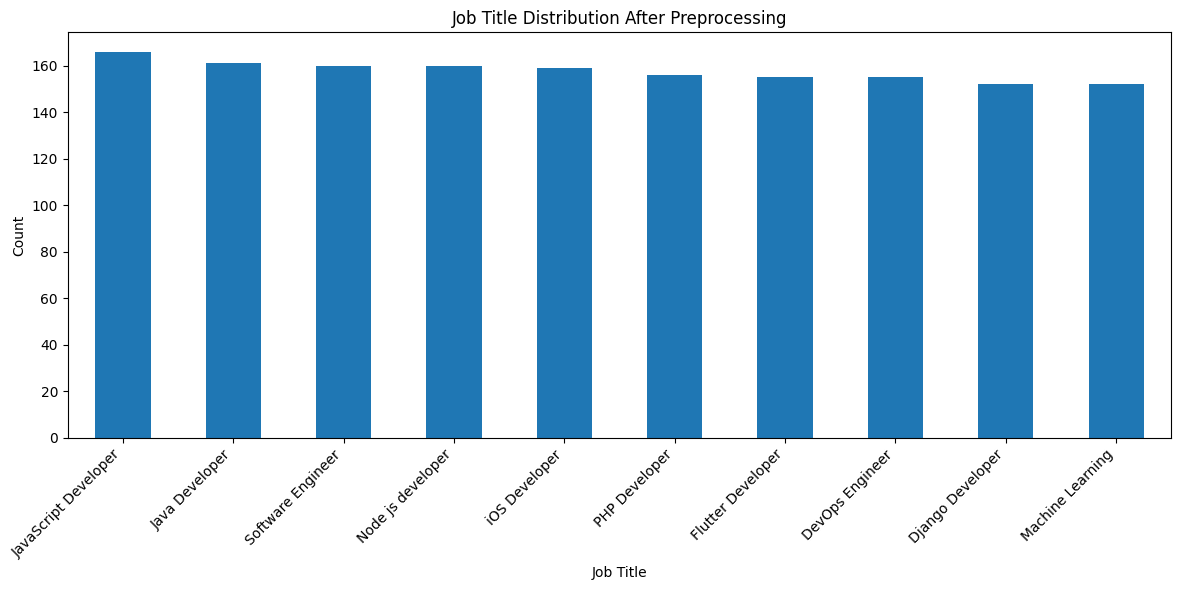

In [16]:
# Check the distribution after preprocessing
plt.figure(figsize=(12, 6))
processed_df['Job Title'].value_counts().plot(kind='bar')
plt.title('Job Title Distribution After Preprocessing')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Add job-specific stopwords
job_stopwords = {'job', 'position', 'role', 'looking', 'seeking', 'hiring', 'company', 'work', 'experience'}
stop_words.update(job_stopwords)

In [30]:
# Clean text function
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove special characters but keep hyphens
    text = re.sub(r'[^\w\s-]', ' ', text)
    
    # Remove extra whitespace
    text = ' '.join(text.split())
    
    # Tokenize and lemmatize
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and len(token) > 2]
    
    return ' '.join(tokens)

In [31]:
import re
# Apply text cleaning
df['cleaned_text'] = df['Job Description'].apply(clean_text)

# Compare original and cleaned text
print("Original text:")
print(df['Job Description'].iloc[0][:200], "...")
print("\nCleaned text:")
print(df['cleaned_text'].iloc[0][:200], "...")

Original text:
We are looking for hire experts flutter developer. So you are eligible this post then apply your resume.
Job Types: Full-time, Part-time
Salary: ₹20,000.00 - ₹40,000.00 per month
Benefits:
Flexible sc ...

Cleaned text:
hire expert flutter developer eligible post apply resume type full-time part-time salary 000 000 per month benefit flexible schedule food allowance schedule day shift supplemental pay joining bonus ov ...


In [33]:
# Save processed data
df.to_csv('../data/processed_job_descriptions.csv', index=False)
print("Processed data saved successfully!")

Processed data saved successfully!


## Load Processed data

In [34]:
# Load processed data
df = pd.read_csv('../data/processed_job_descriptions.csv')

# Display basic information
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (2277, 5)

First few rows:


,Unnamed: 0,Job Title,Job Description,standardized_title,cleaned_text
0,0,Flutter Developer,We are looking for hire experts flutter develo...,flutter developer,hire expert flutter developer eligible post ap...
1,1,Django Developer,PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ ...,django developer,python django developer lead code pdj strong p...
2,2,Machine Learning,"Data Scientist (Contractor)\n\nBangalore, IN\n...",machine learning,data scientist contractor bangalore responsibi...
3,3,iOS Developer,JOB DESCRIPTION:\n\nStrong framework outside o...,ios developer,description strong framework outside io always...
4,4,Full Stack Developer,job responsibility full stack engineer – react...,full stack developer,responsibility full stack engineer react make ...


## Prepare data for training

In [35]:
# Split data into training and testing sets
X = df['cleaned_text']
y = df['Job Title']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 1821
Testing set size: 456


## 4. Model Training and Evaluation

### 4.1 Random Forest Classifier

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
# Create pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=10000,
        ngram_range=(1, 2),
        min_df=2,
        max_df=0.95
    )),
    ('clf', RandomForestClassifier(
        n_estimators=200,
        max_depth=50,
        random_state=42
    ))
])

In [73]:
# Train the model
pipeline.fit(X_train, y_train)
print("Model training completed!")

Model training completed!


In [74]:
# Make predictions
y_pred = pipeline.predict(X_test)

# Print classification report
print("Classification Report Random forest:")
print(classification_report(y_test, y_pred))

Classification Report Random forest:
                        precision    recall  f1-score   support

     Backend Developer       0.94      0.52      0.67        29
Database Administrator       0.90      0.96      0.93        28
       DevOps Engineer       0.88      0.97      0.92        31
      Django Developer       0.90      0.87      0.89        31
     Flutter Developer       0.84      1.00      0.91        31
  Full Stack Developer       0.78      0.75      0.76        28
        Java Developer       0.61      0.59      0.60        32
  JavaScript Developer       0.84      0.79      0.81        33
      Machine Learning       0.88      0.94      0.91        31
 Network Administrator       0.87      0.93      0.90        29
     Node js developer       0.83      0.91      0.87        32
         PHP Developer       0.96      0.81      0.88        31
     Software Engineer       0.48      0.50      0.49        32
   Wordpress Developer       0.87      1.00      0.93        26
  

### 4.2 SVM Classifier

In [69]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=10000,
        ngram_range=(1, 2),
        min_df=2,
        max_df=0.95
    )),
    ('clf', SVC(
        kernel='linear',  # or 'rbf' if you want non-linear
        C=1.0,
        random_state=42,
        class_weight='balanced'
    ))
])


In [70]:
svm_pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.95, max_features=10000, min_df=2,
                                 ngram_range=(1, 2))),
                ('clf',
                 SVC(class_weight='balanced', kernel='linear',
                     random_state=42))])

In [71]:
# Make predictions
y_pred = svm_pipeline.predict(X_test)

# Print classification report
print("Classification Report SVM:")
print(classification_report(y_test, y_pred))

Classification Report SVM:
                        precision    recall  f1-score   support

     Backend Developer       0.54      0.69      0.61        29
Database Administrator       0.93      0.93      0.93        28
       DevOps Engineer       0.97      0.94      0.95        31
      Django Developer       0.93      0.81      0.86        31
     Flutter Developer       0.94      0.94      0.94        31
  Full Stack Developer       0.79      0.79      0.79        28
        Java Developer       0.70      0.72      0.71        32
  JavaScript Developer       0.87      0.79      0.83        33
      Machine Learning       1.00      0.87      0.93        31
 Network Administrator       1.00      0.90      0.95        29
     Node js developer       0.86      0.78      0.82        32
         PHP Developer       0.86      0.81      0.83        31
     Software Engineer       0.51      0.75      0.61        32
   Wordpress Developer       0.92      0.88      0.90        26
         iOS

### 4.3 Naive Bayes Classifier

In [81]:
from sklearn.naive_bayes import MultinomialNB

nb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=1000,
        ngram_range=(1, 2),
        min_df=2,
        max_df=0.95
    )),
    ('clf', MultinomialNB())
])

In [82]:
nb_pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.95, max_features=1000, min_df=2,
                                 ngram_range=(1, 2))),
                ('clf', MultinomialNB())])

In [84]:
nb_preds = nb_pipeline.predict(X_test)
# Print classification report
print("Classification Report NB:")
print(classification_report(y_test, nb_preds))

Classification Report NB:
                        precision    recall  f1-score   support

     Backend Developer       1.00      0.31      0.47        29
Database Administrator       0.81      0.89      0.85        28
       DevOps Engineer       0.86      0.97      0.91        31
      Django Developer       0.92      0.77      0.84        31
     Flutter Developer       0.67      0.97      0.79        31
  Full Stack Developer       0.68      0.61      0.64        28
        Java Developer       0.62      0.31      0.42        32
  JavaScript Developer       0.82      0.70      0.75        33
      Machine Learning       0.90      0.90      0.90        31
 Network Administrator       0.96      0.79      0.87        29
     Node js developer       0.59      0.91      0.72        32
         PHP Developer       0.76      0.84      0.80        31
     Software Engineer       0.46      0.69      0.55        32
   Wordpress Developer       0.88      0.85      0.86        26
         iOS 

## 5. Save model

In [86]:
# Save Naive Bayes
joblib.dump(nb_pipeline, r'C:\Projects\Job Recommendation\artifacts\naive_bayes_model.pkl')

# Save SVM
joblib.dump(svm_pipeline, r'C:\Projects\Job Recommendation\artifacts\svm_model.pkl')

# Save Random Forest
joblib.dump(pipeline, r'C:\Projects\Job Recommendation\artifacts\random_forest_model.pkl')

['C:\\Projects\\Job Recommendation\\artifacts\\random_forest_model.pkl']

## 6. Test Cases

In [88]:
classifiers = {
    "Naive Bayes": nb_pipeline,
    "SVM": svm_pipeline,
    "Random Forest": pipeline
}

In [93]:
import numpy as np

# Sample test cases
test_cases = [
    """Looking for a skilled software engineer with experience in Python, Java, and web development. 
    Must have knowledge of algorithms, data structures, and software design patterns.""",
    
    """Data science Expert needed. Experience with EDA, data analysis. 
    Knowledge of python or r required."""
]

# Test each classifier
for desc in test_cases:
    print("\n📄 Testing job description snippet:", desc[:100], "...\n" + "-"*60)
    
    for name, clf in classifiers.items():
        # Predict the class and probabilities
        prediction = clf.predict([desc])[0]

        # Check if classifier supports predict_proba
        if hasattr(clf, "predict_proba"):
            probas = clf.predict_proba([desc])[0]
            top_3_idx = np.argsort(probas)[-3:][::-1]
            
            print(f"\n🔹 {name} predictions:")
            print(f"Predicted job title: {prediction}")
            # print("Top 3 predictions with probabilities:")
            # for idx in top_3_idx:
            #     print(f" - {clf.classes_[idx]}: {probas[idx]:.3f}")
        else:
            print(f"\n🔹 {name} predictions:")
            print(f"Predicted job title: {prediction}")
            # print("(No probability scores available for this model)")



📄 Testing job description snippet: Looking for a skilled software engineer with experience in Python, Java, and web development. 
    M ...
------------------------------------------------------------

🔹 Naive Bayes predictions:
Predicted job title: Software Engineer

🔹 SVM predictions:
Predicted job title: Software Engineer

🔹 Random Forest predictions:
Predicted job title: Software Engineer

📄 Testing job description snippet: Data science Expert needed. Experience with EDA, data analysis. 
    Knowledge of python or r requir ...
------------------------------------------------------------

🔹 Naive Bayes predictions:
Predicted job title: Machine Learning

🔹 SVM predictions:
Predicted job title: Machine Learning

🔹 Random Forest predictions:
Predicted job title: Machine Learning


## LSTM

In [7]:
!pip uninstall torch -y
!pip install torch --upgrade

Found existing installation: torch 2.4.1
Uninstalling torch-2.4.1:
  Successfully uninstalled torch-2.4.1
  Using cached torch-2.4.1-cp38-cp38-win_amd64.whl.metadata (27 kB)
Using cached torch-2.4.1-cp38-cp38-win_amd64.whl (199.4 MB)


In [8]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [43]:
class JobDataset(Dataset):
    def __init__(self, texts, labels, vectorizer, max_length=200):
        self.texts = texts
        self.labels = labels
        self.vectorizer = vectorizer
        self.max_length = max_length
        
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        
        # Ensure text is a string
        if isinstance(text, np.ndarray):
            text = str(text[0]) if text.size > 0 else ""
        elif not isinstance(text, str):
            text = str(text)
        
        # Convert text to sequence using the vectorizer
        sequence = self.vectorizer.transform([text]).toarray()[0]
        
        # Pad sequence if needed
        if len(sequence) < self.max_length:
            padded = np.zeros(self.max_length, dtype=np.float32)
            padded[:len(sequence)] = sequence
            sequence = padded
        else:
            sequence = sequence[:self.max_length]
        
        return torch.FloatTensor(sequence), torch.LongTensor([label])

In [44]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_dim, num_classes):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_dim, num_layers=2, 
                          batch_first=True, dropout=0.3, bidirectional=True)
        self.fc = nn.Sequential(
            nn.Linear(hidden_dim * 2, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, num_classes)
        )
        
    def forward(self, x):
        # Reshape input for LSTM (batch_size, seq_len, input_size)
        x = x.unsqueeze(1)  # Add sequence length dimension
        lstm_out, _ = self.lstm(x)
        last_hidden = lstm_out[:, -1, :]
        output = self.fc(last_hidden)
        return output

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
# Load data
df = pd.read_csv(r'C:\Projects\Job Recommendation\data\processed_job_descriptions.csv')

# Split data
X = df['cleaned_text']
y = df['Job Title']

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Create vectorizer
vectorizer = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1, 2),
    min_df=3,
    max_df=0.8,
    stop_words='english'
)

# Fit vectorizer
X_train_tfidf = vectorizer.fit_transform(X_train)
max_sequence_length = (X_train_tfidf.shape[1])

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

print(f"Number of classes: {len(label_encoder.classes_)}")
print(f"Max sequence length: {max_sequence_length}")

Number of classes: 15
Max sequence length: 10000


In [46]:
# Create datasets
train_dataset = JobDataset(X_train, y_train_encoded, vectorizer, max_sequence_length)
test_dataset = JobDataset(X_test, y_test_encoded, vectorizer, max_sequence_length)

# Create dataloaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Training batches: {len(train_loader)}")
print(f"Testing batches: {len(test_loader)}")

Training batches: 57
Testing batches: 15


In [47]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Initialize model
model = LSTMModel(
    input_size=max_sequence_length,
    hidden_dim=128,
    num_classes=len(label_encoder.classes_)
).to(device)

# Training setup
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

# Learning rate scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2)

Using device: cpu


In [48]:
!pip install tqdm

In [49]:
from tqdm import tqdm
def train_epoch(model, dataloader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    
    for batch_X, batch_y in tqdm(dataloader, desc="Training"):
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y.squeeze())
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    return total_loss / len(dataloader)

def evaluate(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0
    all_predictions = []
    all_labels = []
    
    with torch.no_grad():
        for batch_X, batch_y in tqdm(dataloader, desc="Evaluating"):
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y.squeeze())
            total_loss += loss.item()
            
            predictions = torch.argmax(outputs, dim=1)
            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(batch_y.squeeze().cpu().numpy())
    
    return total_loss / len(dataloader), all_predictions, all_labels

# Training loop
num_epochs = 10
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    
    # Train
    train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)
    
    # Evaluate
    val_loss, val_predictions, val_labels = evaluate(model, test_loader, criterion, device)
    val_losses.append(val_loss)
    
    # Update learning rate
    scheduler.step(val_loss)
    
    print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(val_labels, val_predictions, 
                              target_names=label_encoder.classes_))


Epoch 1/10


Evaluating: 100%|██████████| 15/15 [00:01<00:00, 12.96it/s]
c:\Users\Komal\anaconda3\envs\job_recommendation\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Komal\anaconda3\envs\job_recommendation\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Komal\anaconda3\envs\job_recommendation\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

Train Loss: 2.6952, Val Loss: 2.6198

Classification Report:
                        precision    recall  f1-score   support

     Backend Developer       0.02      0.10      0.04        29
Database Administrator       0.00      0.00      0.00        28
       DevOps Engineer       0.00      0.00      0.00        31
      Django Developer       0.00      0.00      0.00        31
     Flutter Developer       0.00      0.00      0.00        31
  Full Stack Developer       0.00      0.00      0.00        28
        Java Developer       0.00      0.00      0.00        32
  JavaScript Developer       0.00      0.00      0.00        33
      Machine Learning       1.00      0.16      0.28        31
 Network Administrator       0.00      0.00      0.00        29
     Node js developer       0.38      0.69      0.49        32
         PHP Developer       0.16      0.55      0.25        31
     Software Engineer       0.00      0.00      0.00        32
   Wordpress Developer       0.00      0.0

Evaluating: 100%|██████████| 15/15 [00:00<00:00, 17.20it/s]
c:\Users\Komal\anaconda3\envs\job_recommendation\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Komal\anaconda3\envs\job_recommendation\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Komal\anaconda3\envs\job_recommendation\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

Train Loss: 2.0196, Val Loss: 1.3689

Classification Report:
                        precision    recall  f1-score   support

     Backend Developer       0.40      0.28      0.33        29
Database Administrator       0.78      0.89      0.83        28
       DevOps Engineer       0.72      0.84      0.78        31
      Django Developer       0.95      0.65      0.77        31
     Flutter Developer       0.92      0.74      0.82        31
  Full Stack Developer       0.00      0.00      0.00        28
        Java Developer       0.21      0.75      0.33        32
  JavaScript Developer       0.34      0.30      0.32        33
      Machine Learning       0.96      0.77      0.86        31
 Network Administrator       1.00      0.59      0.74        29
     Node js developer       0.57      0.81      0.67        32
         PHP Developer       0.64      0.74      0.69        31
     Software Engineer       0.25      0.03      0.06        32
   Wordpress Developer       0.86      0.7

Evaluating: 100%|██████████| 15/15 [00:00<00:00, 23.44it/s]


Train Loss: 1.0078, Val Loss: 0.9677

Classification Report:
                        precision    recall  f1-score   support

     Backend Developer       0.46      0.45      0.46        29
Database Administrator       0.79      0.93      0.85        28
       DevOps Engineer       0.87      0.87      0.87        31
      Django Developer       0.85      0.74      0.79        31
     Flutter Developer       0.73      0.87      0.79        31
  Full Stack Developer       0.46      0.39      0.42        28
        Java Developer       0.37      0.50      0.43        32
  JavaScript Developer       0.55      0.48      0.52        33
      Machine Learning       0.96      0.87      0.92        31
 Network Administrator       0.96      0.83      0.89        29
     Node js developer       0.68      0.78      0.72        32
         PHP Developer       0.88      0.68      0.76        31
     Software Engineer       0.42      0.41      0.41        32
   Wordpress Developer       0.81      0.8

Evaluating: 100%|██████████| 15/15 [00:00<00:00, 22.09it/s]


Train Loss: 0.5902, Val Loss: 0.9606

Classification Report:
                        precision    recall  f1-score   support

     Backend Developer       0.44      0.59      0.50        29
Database Administrator       0.93      0.89      0.91        28
       DevOps Engineer       0.90      0.87      0.89        31
      Django Developer       0.79      0.74      0.77        31
     Flutter Developer       0.93      0.87      0.90        31
  Full Stack Developer       0.55      0.39      0.46        28
        Java Developer       0.47      0.25      0.33        32
  JavaScript Developer       0.50      0.61      0.55        33
      Machine Learning       1.00      0.77      0.87        31
 Network Administrator       0.96      0.86      0.91        29
     Node js developer       0.88      0.72      0.79        32
         PHP Developer       0.88      0.68      0.76        31
     Software Engineer       0.36      0.84      0.50        32
   Wordpress Developer       0.88      0.8

Evaluating: 100%|██████████| 15/15 [00:00<00:00, 23.32it/s]


Train Loss: 0.3749, Val Loss: 0.9840

Classification Report:
                        precision    recall  f1-score   support

     Backend Developer       0.42      0.59      0.49        29
Database Administrator       0.96      0.82      0.88        28
       DevOps Engineer       0.92      0.77      0.84        31
      Django Developer       0.92      0.71      0.80        31
     Flutter Developer       0.90      0.84      0.87        31
  Full Stack Developer       0.43      0.36      0.39        28
        Java Developer       0.57      0.41      0.47        32
  JavaScript Developer       0.49      0.70      0.57        33
      Machine Learning       0.87      0.87      0.87        31
 Network Administrator       1.00      0.83      0.91        29
     Node js developer       0.79      0.72      0.75        32
         PHP Developer       0.87      0.65      0.74        31
     Software Engineer       0.44      0.81      0.57        32
   Wordpress Developer       0.82      0.8

Evaluating: 100%|██████████| 15/15 [00:00<00:00, 21.77it/s]


Train Loss: 0.2283, Val Loss: 1.1008

Classification Report:
                        precision    recall  f1-score   support

     Backend Developer       0.44      0.52      0.48        29
Database Administrator       0.96      0.86      0.91        28
       DevOps Engineer       0.93      0.90      0.92        31
      Django Developer       0.85      0.74      0.79        31
     Flutter Developer       0.96      0.81      0.88        31
  Full Stack Developer       0.60      0.43      0.50        28
        Java Developer       0.52      0.47      0.49        32
  JavaScript Developer       0.38      0.70      0.49        33
      Machine Learning       0.96      0.81      0.88        31
 Network Administrator       0.96      0.83      0.89        29
     Node js developer       0.65      0.75      0.70        32
         PHP Developer       0.85      0.71      0.77        31
     Software Engineer       0.46      0.56      0.51        32
   Wordpress Developer       0.88      0.8

Evaluating: 100%|██████████| 15/15 [00:00<00:00, 20.35it/s]


Train Loss: 0.1696, Val Loss: 1.1767

Classification Report:
                        precision    recall  f1-score   support

     Backend Developer       0.38      0.66      0.48        29
Database Administrator       0.96      0.86      0.91        28
       DevOps Engineer       0.92      0.74      0.82        31
      Django Developer       1.00      0.58      0.73        31
     Flutter Developer       0.96      0.84      0.90        31
  Full Stack Developer       0.43      0.36      0.39        28
        Java Developer       0.50      0.47      0.48        32
  JavaScript Developer       0.45      0.61      0.52        33
      Machine Learning       0.96      0.74      0.84        31
 Network Administrator       0.96      0.83      0.89        29
     Node js developer       0.84      0.66      0.74        32
         PHP Developer       0.86      0.61      0.72        31
     Software Engineer       0.42      0.84      0.56        32
   Wordpress Developer       0.81      0.8

Evaluating: 100%|██████████| 15/15 [00:00<00:00, 19.13it/s]


Train Loss: 0.1315, Val Loss: 1.1297

Classification Report:
                        precision    recall  f1-score   support

     Backend Developer       0.47      0.55      0.51        29
Database Administrator       0.96      0.86      0.91        28
       DevOps Engineer       0.90      0.87      0.89        31
      Django Developer       0.95      0.65      0.77        31
     Flutter Developer       0.96      0.87      0.92        31
  Full Stack Developer       0.48      0.43      0.45        28
        Java Developer       0.54      0.44      0.48        32
  JavaScript Developer       0.42      0.67      0.52        33
      Machine Learning       0.96      0.74      0.84        31
 Network Administrator       0.96      0.83      0.89        29
     Node js developer       0.75      0.75      0.75        32
         PHP Developer       0.85      0.71      0.77        31
     Software Engineer       0.46      0.81      0.59        32
   Wordpress Developer       0.84      0.8

Evaluating: 100%|██████████| 15/15 [00:00<00:00, 18.45it/s]


Train Loss: 0.1199, Val Loss: 1.1321

Classification Report:
                        precision    recall  f1-score   support

     Backend Developer       0.47      0.55      0.51        29
Database Administrator       0.92      0.86      0.89        28
       DevOps Engineer       0.90      0.90      0.90        31
      Django Developer       0.95      0.68      0.79        31
     Flutter Developer       0.96      0.87      0.92        31
  Full Stack Developer       0.54      0.46      0.50        28
        Java Developer       0.52      0.44      0.47        32
  JavaScript Developer       0.45      0.73      0.56        33
      Machine Learning       0.96      0.81      0.88        31
 Network Administrator       0.96      0.83      0.89        29
     Node js developer       0.73      0.75      0.74        32
         PHP Developer       0.85      0.74      0.79        31
     Software Engineer       0.48      0.72      0.57        32
   Wordpress Developer       0.83      0.7

Evaluating: 100%|██████████| 15/15 [00:00<00:00, 22.66it/s]

Train Loss: 0.1073, Val Loss: 1.1388

Classification Report:
                        precision    recall  f1-score   support

     Backend Developer       0.48      0.52      0.50        29
Database Administrator       0.92      0.86      0.89        28
       DevOps Engineer       0.90      0.87      0.89        31
      Django Developer       0.92      0.71      0.80        31
     Flutter Developer       0.96      0.87      0.92        31
  Full Stack Developer       0.52      0.46      0.49        28
        Java Developer       0.56      0.44      0.49        32
  JavaScript Developer       0.43      0.70      0.53        33
      Machine Learning       0.96      0.81      0.88        31
 Network Administrator       0.96      0.83      0.89        29
     Node js developer       0.72      0.72      0.72        32
         PHP Developer       0.85      0.71      0.77        31
     Software Engineer       0.47      0.78      0.59        32
   Wordpress Developer       0.83      0.7

In [50]:
print(f"Number of classes: {len(label_encoder.classes_)}")


Number of classes: 15


## Updated LSTM with Embedding + Attention

In [131]:
from gensim.utils import simple_preprocess
from collections import Counter

# Tokenize texts
tokenized_texts = [simple_preprocess(text) for text in X_train]

# Build vocabulary
word_counts = Counter(token for tokens in tokenized_texts for token in tokens)
min_freq = 3  # filter out rare words

vocab = {'<PAD>': 0, '<UNK>': 1}
for word, count in word_counts.items():
    if count >= min_freq:
        vocab[word] = len(vocab)

print(f"Vocab size: {len(vocab)}")


Vocab size: 6109


In [132]:
def text_to_sequence(text, vocab, max_len):
    tokens = simple_preprocess(text)
    sequence = [vocab.get(token, vocab['<UNK>']) for token in tokens]

    # Padding or trimming
    if len(sequence) < max_len:
        sequence += [vocab['<PAD>']] * (max_len - len(sequence))
    else:
        sequence = sequence[:max_len]
    
    return sequence


In [133]:
class JobDataset(Dataset):
    def __init__(self, texts, labels, vocab, max_len):
        self.texts = texts
        self.labels = labels
        self.vocab = vocab
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        sequence = text_to_sequence(text, self.vocab, self.max_len)
        return torch.LongTensor(sequence), torch.LongTensor([label])


In [134]:
vocab_size = len(vocab)
model = LSTMAttentionModel(vocab_size, embedding_dim, hidden_dim, num_classes).to(device)


In [135]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from gensim.models import FastText
from tqdm import tqdm

# 1. Load data
df = pd.read_csv(r'C:\Projects\Job Recommendation\data\processed_job_descriptions.csv')
X = df['cleaned_text']
y = df['Job Title']

# 2. Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 3. Train-test split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

# 4. Tokenize
def tokenize(text):
    return text.lower().split()

X_train_tokens = [tokenize(text) for text in X_train]
X_test_tokens = [tokenize(text) for text in X_test]

# 5. Train FastText model
ft_model = FastText(sentences=X_train_tokens, vector_size=100, window=5, min_count=1, workers=4, epochs=10)

# 6. Build vocabulary
vocab = {word: idx+1 for idx, word in enumerate(ft_model.wv.index_to_key)}
vocab['<PAD>'] = 0

embedding_matrix = np.zeros((len(vocab), 100))
for word, idx in vocab.items():
    if word == '<PAD>':
        continue
    embedding_matrix[idx] = ft_model.wv[word]

# 7. Prepare dataset
max_length = 100

def encode_text(tokens):
    encoded = [vocab.get(token, 0) for token in tokens]
    if len(encoded) < max_length:
        encoded += [0] * (max_length - len(encoded))
    else:
        encoded = encoded[:max_length]
    return encoded

X_train_encoded = [encode_text(tokens) for tokens in X_train_tokens]
X_test_encoded = [encode_text(tokens) for tokens in X_test_tokens]

class JobDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.long)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = JobDataset(X_train_encoded, y_train)
test_dataset = JobDataset(X_test_encoded, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# 8. Model with attention
class AttentionLSTM(nn.Module):
    def __init__(self, embedding_matrix, hidden_dim, num_classes):
        super().__init__()
        vocab_size, emb_dim = embedding_matrix.shape
        self.embedding = nn.Embedding.from_pretrained(torch.tensor(embedding_matrix, dtype=torch.float32), freeze=False)
        self.lstm = nn.LSTM(emb_dim, hidden_dim, num_layers=2, batch_first=True, bidirectional=True)
        self.attn = nn.Linear(hidden_dim * 2, 1)
        self.fc = nn.Sequential(
            nn.Linear(hidden_dim * 2, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.embedding(x)
        lstm_out, _ = self.lstm(x)
        attn_weights = torch.softmax(self.attn(lstm_out).squeeze(-1), dim=1)
        context = torch.sum(attn_weights.unsqueeze(-1) * lstm_out, dim=1)
        return self.fc(context)

# 9. Train and evaluate
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = AttentionLSTM(embedding_matrix, hidden_dim=128, num_classes=len(label_encoder.classes_)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

def evaluate(model, data_loader):
    model.eval()
    correct = total = 0
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return correct / total

def train_model(model, train_loader, test_loader, epochs=10):
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)
        acc = evaluate(model, test_loader)
        print(f"Epoch {epoch+1}: Loss = {avg_loss:.4f}, Accuracy = {acc:.4f}")

# 10. Run training
train_model(model, train_loader, test_loader, epochs=10)


Epoch 1/10: 100%|██████████| 57/57 [00:11<00:00,  5.18it/s]


Epoch 1: Loss = 2.2938, Accuracy = 0.3706


Epoch 2/10: 100%|██████████| 57/57 [00:10<00:00,  5.29it/s]


Epoch 2: Loss = 1.5835, Accuracy = 0.4715


Epoch 3/10: 100%|██████████| 57/57 [00:10<00:00,  5.32it/s]


Epoch 3: Loss = 1.3167, Accuracy = 0.6031


Epoch 4/10: 100%|██████████| 57/57 [00:11<00:00,  5.04it/s]


Epoch 4: Loss = 1.0591, Accuracy = 0.5811


Epoch 5/10: 100%|██████████| 57/57 [00:11<00:00,  5.17it/s]


Epoch 5: Loss = 0.8602, Accuracy = 0.6864


Epoch 6/10: 100%|██████████| 57/57 [00:38<00:00,  1.46it/s]


Epoch 6: Loss = 0.7162, Accuracy = 0.6952


Epoch 7/10: 100%|██████████| 57/57 [00:11<00:00,  4.88it/s]


Epoch 7: Loss = 0.6072, Accuracy = 0.7171


Epoch 8/10: 100%|██████████| 57/57 [00:37<00:00,  1.51it/s]


Epoch 8: Loss = 0.5335, Accuracy = 0.6886


Epoch 9/10: 100%|██████████| 57/57 [00:13<00:00,  4.24it/s]


Epoch 9: Loss = 0.4594, Accuracy = 0.6930


Epoch 10/10: 100%|██████████| 57/57 [00:17<00:00,  3.26it/s]


Epoch 10: Loss = 0.3844, Accuracy = 0.6930


## FFNN

In [110]:
df = pd.read_csv(r'C:\Projects\Job Recommendation\data\processed_job_descriptions.csv')

X = df['cleaned_text']
y = df['Job Title']


In [111]:
# Stratified split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X.iloc[train_idx].reset_index(drop=True), X.iloc[test_idx].reset_index(drop=True)
    y_train, y_test = y.iloc[train_idx].reset_index(drop=True), y.iloc[test_idx].reset_index(drop=True)


In [112]:
vectorizer = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1, 2),
    min_df=3,
    max_df=0.8,
    stop_words='english'
)
X_train_tfidf = vectorizer.fit_transform(X_train)
max_input_dim = X_train_tfidf.shape[1]


In [113]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
num_classes = len(label_encoder.classes_)


In [114]:
class JobDataset(Dataset):
    def __init__(self, texts, labels, vectorizer):
        self.texts = texts
        self.labels = labels
        self.vectorizer = vectorizer

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        vector = self.vectorizer.transform([text]).toarray().squeeze()
        return torch.tensor(vector, dtype=torch.float32), torch.tensor(label, dtype=torch.long)

train_dataset = JobDataset(X_train, y_train_encoded, vectorizer)
test_dataset = JobDataset(X_test, y_test_encoded, vectorizer)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
import torch.nn as nn

class FFNNModel(nn.Module):
    def __init__(self, input_size, hidden_dim, num_classes):
        super(FFNNModel, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)
)
        

    def forward(self, x):
        return self.fc(x)


SyntaxError: unmatched ')' (1581607432.py, line 17)

In [121]:
class JobDataset(Dataset):
    def __init__(self, texts, labels, vectorizer):
        self.texts = texts
        self.labels = labels
        self.vectorizer = vectorizer

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        if isinstance(text, np.ndarray):
            text = str(text[0]) if text.size > 0 else ""
        elif not isinstance(text, str):
            text = str(text)
        vector = self.vectorizer.transform([text]).toarray()[0]
        return torch.FloatTensor(vector), torch.tensor(label, dtype=torch.long)


In [122]:
input_size = X_train_tfidf.shape[1]  # Use full feature size, no truncation
hidden_dim = 128
num_classes = len(label_encoder.classes_)

model = FFNNModel(input_size=input_size, hidden_dim=hidden_dim, num_classes=num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [123]:
def train_epoch(model, dataloader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for X_batch, y_batch in dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(dataloader)

def evaluate(model, dataloader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in dataloader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            _, predicted = torch.max(outputs.data, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
    return correct / total


In [124]:
num_epochs = 30
train_losses = []

for epoch in range(num_epochs):
    train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)
    test_acc = evaluate(model, test_loader, device)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}, Test Accuracy: {test_acc:.4f}")


AttributeError: 'FFNNModel' object has no attribute 'fc'

## FFNN with BERT Embeddings

In [78]:
!pip install transformers
!pip install sentence-transformers


  Using cached transformers-4.46.3-py3-none-any.whl.metadata (44 kB)
  Using cached huggingface_hub-0.30.2-py3-none-any.whl.metadata (13 kB)
  Using cached PyYAML-6.0.2-cp38-cp38-win_amd64.whl.metadata (2.1 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached tokenizers-0.20.3-cp38-none-win_amd64.whl.metadata (6.9 kB)
  Using cached safetensors-0.5.3-cp38-abi3-win_amd64.whl.metadata (3.9 kB)
  Using cached charset_normalizer-3.4.1-cp38-cp38-win_amd64.whl.metadata (36 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.1.31-py3-none-any.whl.metadata (2.5 kB)
Using cached transformers-4.46.3-py3-none-any.whl (10.0 MB)
Using cached huggingface_hub-0.30.2-py3-none-any.whl (481 kB)
Using cached PyYAML-6.0.2-cp38-cp38-win_amd64.whl (162 kB)
Using cached safetensors-0.5.3-cp38-abi3-win_amd64.whl (308 kB)
Using cached tokenizers-0.20.3-cp38-none-win_amd64.whl (

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit


# Load and Preprocess Data

df = pd.read_csv(r'C:\Projects\Job Recommendation\data\processed_job_descriptions.csv')

X = df['cleaned_text']
y = df['Job Title']

# Stratified Split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X.iloc[train_idx].reset_index(drop=True), X.iloc[test_idx].reset_index(drop=True)
    y_train, y_test = y.iloc[train_idx].reset_index(drop=True), y.iloc[test_idx].reset_index(drop=True)

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1, 2),
    min_df=3,
    max_df=0.8,
    stop_words='english'
)
vectorizer.fit(X_train)

# Transform into TF-IDF features
X_train_tfidf = vectorizer.transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

# Label Encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

print(f"TF-IDF input dim: {X_train_tfidf.shape[1]}, Num classes: {len(label_encoder.classes_)}")

# Dataset Class

class JobDataset(Dataset):
    def __init__(self, tfidf_vectors, labels):
        self.vectors = tfidf_vectors
        self.labels = labels

    def __len__(self):
        return len(self.vectors)

    def __getitem__(self, idx):
        return torch.tensor(self.vectors[idx], dtype=torch.float32), torch.tensor(self.labels[idx], dtype=torch.long)


# Dataloaders

batch_size = 32
train_dataset = JobDataset(X_train_tfidf, y_train_encoded)
test_dataset = JobDataset(X_test_tfidf, y_test_encoded)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)


# Improved FFNN Model

class ImprovedFFNN(nn.Module):
    def __init__(self, input_dim, hidden_dims, num_classes):
        super().__init__()
        layers = []
        prev_dim = input_dim

        for hidden_dim in hidden_dims:
            layers.extend([
                nn.Linear(prev_dim, hidden_dim),
                nn.BatchNorm1d(hidden_dim),
                nn.ReLU(),
                nn.Dropout(0.3),
            ])
            prev_dim = hidden_dim

        layers.append(nn.Linear(prev_dim, num_classes))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)


# Training & Evaluation

def train(model, train_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(train_loader)

def evaluate(model, test_loader, device):
    model.eval()
    correct, total = 0, 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct / total


#  Run Training

input_dim = X_train_tfidf.shape[1]
hidden_dims = [512, 256, 128]
num_classes = len(label_encoder.classes_)
num_epochs = 15
learning_rate = 1e-3
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = ImprovedFFNN(input_dim, hidden_dims, num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

for epoch in range(num_epochs):
    train_loss = train(model, train_loader, criterion, optimizer, device)
    accuracy = evaluate(model, test_loader, device)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}, Accuracy: {accuracy:.4f}")


TF-IDF input dim: 10000, Num classes: 15
Epoch 1/15, Loss: 1.7977, Accuracy: 0.7368
Epoch 2/15, Loss: 0.7722, Accuracy: 0.8224
Epoch 3/15, Loss: 0.3468, Accuracy: 0.7939
Epoch 4/15, Loss: 0.2100, Accuracy: 0.8004
Epoch 5/15, Loss: 0.1335, Accuracy: 0.8180
Epoch 6/15, Loss: 0.1104, Accuracy: 0.7961
Epoch 7/15, Loss: 0.1116, Accuracy: 0.8246
Epoch 8/15, Loss: 0.0885, Accuracy: 0.8158
Epoch 9/15, Loss: 0.0732, Accuracy: 0.8048
Epoch 10/15, Loss: 0.0717, Accuracy: 0.8180
Epoch 11/15, Loss: 0.0655, Accuracy: 0.8158
Epoch 12/15, Loss: 0.0571, Accuracy: 0.8180
Epoch 13/15, Loss: 0.0513, Accuracy: 0.8246
Epoch 14/15, Loss: 0.0502, Accuracy: 0.8158
Epoch 15/15, Loss: 0.0564, Accuracy: 0.8048
